In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# A simple polyfit example

In [11]:
nPts = 10

x = np.linspace(0, 3, nPts)
y = x**2 + np.random.normal(0, 0.5, nPts)

coef: [ 1.48877235e+00 -1.80303714e+01  9.04414251e+01 -2.45739182e+02
  4.00890286e+02 -4.16480757e+02  2.84125763e+02 -1.19052964e+02
  2.32168096e+01 -2.62123828e-01]
error: 2.426057122784962e-20
r^2: 1.0


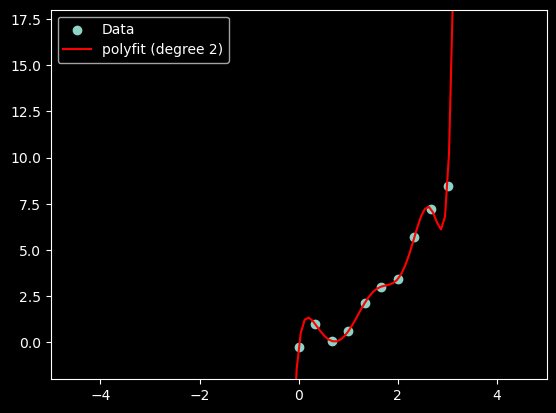

In [12]:
degree = 9
coef = np.polyfit(x, y, degree)
print("coef:", coef)

poly_function = np.poly1d(coef)
pred  = poly_function(x)
error = ((y-pred)**2).sum()
print("error:", error)
print("r^2:", r2_score(y,pred))

x_values = np.linspace(-4, 4, 100)
y_values = poly_function(x_values)

plt.scatter(x, y, label='Data')
plt.plot(x_values, y_values, label='polyfit (degree 2)', color='red')

plt.xlim(-5,5);
plt.ylim(-2,18);
plt.legend();

# Getting some stats

In [7]:
nPts  = 10
nSamp = 10

data = []
for d in range(1,10):
    samp = []
    for i in range(nSamp):
        x = np.linspace(0, 3, nPts)
        y = x**2 + np.random.normal(0, 0.5, nPts)

        coef  = np.polyfit(x, y, d)
        poly_function = np.poly1d(coef)
        pred  = poly_function(x)
        error = ((y-pred)**2).sum()
        r2 = r2_score(y,pred)
        coef = np.append(coef, [error, r2])
        coef = np.flip(coef)
        
        samp.append(coef)
    # end
    data.append(samp)
# end

dfs = []
for i,d in enumerate(data):
    cols = ['r^2', 'error'] + list(range(i+2))
    df = pd.DataFrame(d, columns=cols)
    dfs.append(df)
    display(df.describe().iloc[1:3])
# end

,r^2,error,0,1
mean,0.906764,8.897949,-1.444307,3.081952
std,0.026018,2.292565,0.291814,0.172661


,r^2,error,0,1,2
mean,0.976673,2.248563,-0.247433,0.159143,0.977730
std,0.011936,1.156518,0.382968,0.705552,0.244259


,r^2,error,0,1,2,3
mean,0.982368,1.546808,0.240068,-0.048875,0.918876,0.022796
std,0.008467,0.797613,0.307642,1.689541,1.532081,0.338649


,r^2,error,0,1,2,3,4
mean,0.987500,1.141655,0.071650,-0.399754,1.516603,-0.232045,0.034990
std,0.008965,0.812091,0.587883,2.785853,3.790201,1.937481,0.325995


,r^2,error,0,1,2,3,4,5
mean,0.986034,1.196562,0.031088,0.306132,1.018637,-0.120397,-0.006304,0.011167
std,0.010019,0.830227,0.589130,4.286463,10.823190,9.718702,3.590325,0.467921


,r^2,error,0,1,2,3,4,5,6
mean,0.992020,0.706292,-0.170374,5.881137,-16.899283,21.029046,-11.726532,3.100731,-0.312235
std,0.005216,0.487048,0.328520,7.196891,28.633367,39.689992,24.834785,7.204876,0.789185


,r^2,error,0,1,2,3,4,5,6,7
mean,0.994802,0.453528,-0.014436,-2.562835,20.418300,-41.866557,40.817156,-20.184133,4.934696,-0.473540
std,0.004554,0.367091,0.567844,9.755449,52.723465,105.241517,101.024611,50.033001,12.302011,1.187495


,r^2,error,0,1,2,3,4,5,6,7,8
mean,0.997169,0.253306,-0.188342,8.268905,-45.593978,103.919840,-119.253475,76.849136,-28.012759,5.381371,-0.422723
std,0.003510,0.290689,0.328620,20.717899,127.407920,309.413754,386.533681,269.955944,106.280802,22.013485,1.863251


,r^2,error,0,1,2,3,4,5,6,7,8,9
mean,1.0,4.448803e-19,0.022910,3.518326,-39.799418,143.583533,-240.843152,223.319325,-120.816914,37.989480,-6.439690,0.455489
std,0.0,5.354030e-19,0.453517,91.118281,689.634334,2047.861946,3179.802653,2868.476462,1557.608587,501.632197,88.208429,6.519735
